<a href="https://colab.research.google.com/github/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/10/1009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
!pip install kneed

## DBSCAN sklearn demo

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

from sklearn.datasets import make_moons # use in order to create curvy clusters

from kneed import KneeLocator

sns.set_theme()
plt.rcParams["image.cmap"] = "tab10"

### Create the  dataset

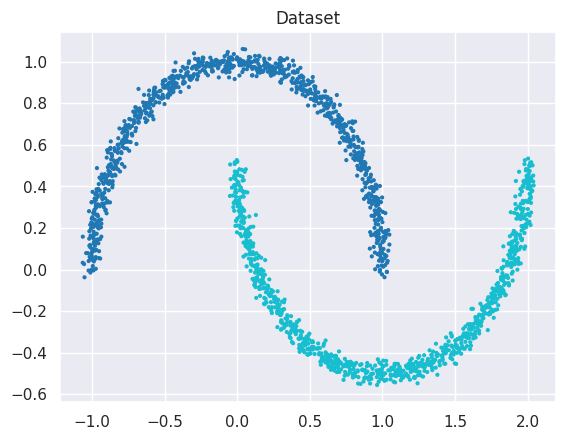

In [5]:
# Create moon dataset
X, y = make_moons(
    n_samples=2000,
    shuffle=True,
    noise=0.03,
    random_state=12
)

# Plot moon dataset
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=4)
plt.title('Dataset')
plt.show()

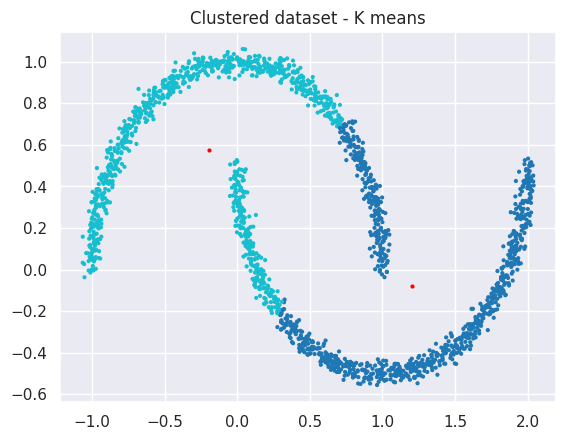

In [6]:
# Cluster moon with k-means
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto')
kmeans.fit(X)

# Plot moon dataset coloured based on kmeans clustering
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=4)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=4, c='red')
plt.title('Clustered dataset - K means')
plt.show()
# k means will fail in this case due to its distance based centroid based approach

## Cluster with raw DBSCAN

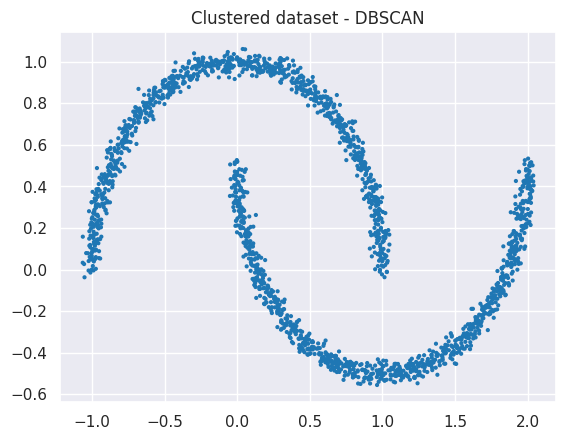

In [7]:
# Cluster with raw dbscan
dbscan = DBSCAN()
_ = dbscan.fit(X)

# Plot clustering results
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, s=4)
plt.title('Clustered dataset - DBSCAN')
plt.show()
# this results in a single cluster which is not good
# and the reason for this is that we didn't tune the DBscan

### Tunning DBSCAN parameters

In [9]:
# Identify MinPts
min_pts = X.shape[1] * 2

# Find distances to min_pts'th neighbor
nbrs = NearestNeighbors().fit(X)
distances, _ = nbrs.kneighbors(X, n_neighbors=min_pts)
distances
# here we have distances to k nearest neighbors
# in this case we are interested in in distances to the kth nearest neighbor

array([[0.        , 0.02398863, 0.03402262, 0.03723304],
       [0.        , 0.00631543, 0.00770052, 0.02352559],
       [0.        , 0.01163632, 0.0137847 , 0.01395889],
       ...,
       [0.        , 0.01676289, 0.01826497, 0.0195886 ],
       [0.        , 0.00556095, 0.00820365, 0.00898442],
       [0.        , 0.00758862, 0.01063988, 0.01587817]])

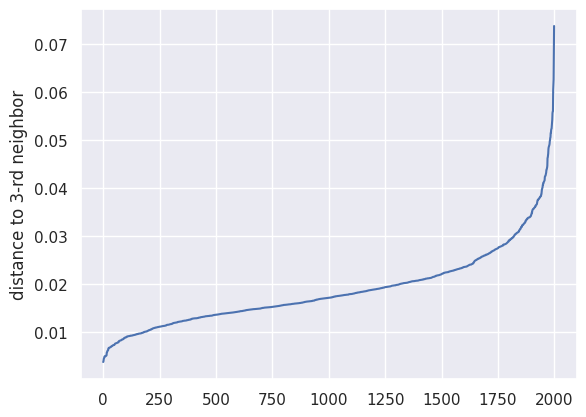

In [10]:
# we will extract the last column and sort the values and use these values in order to create the elbow plot

# Sort the distances to the min_pts'th neighbor
sort_dist = np.sort(distances[:,-1])

# Plot and search for a knee
plt.plot(range(sort_dist.shape[0]), sort_dist)
plt.ylabel('distance to {}-rd neighbor'.format(min_pts-1))
plt.show()

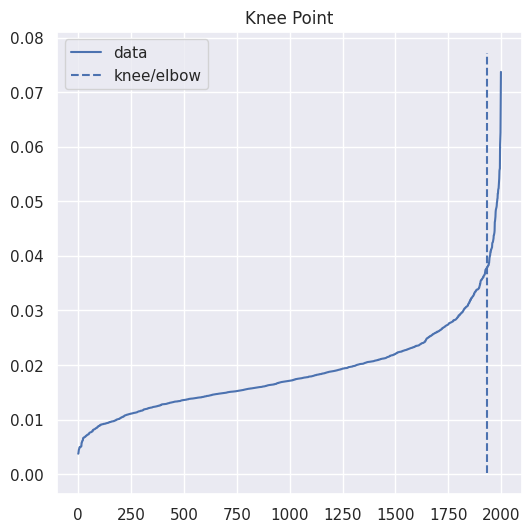

In [11]:
kneedle = KneeLocator(
    range(sort_dist.shape[0]),
    sort_dist,
    S=1.0,
    curve="convex",
    direction="increasing"
)
kneedle.plot_knee()

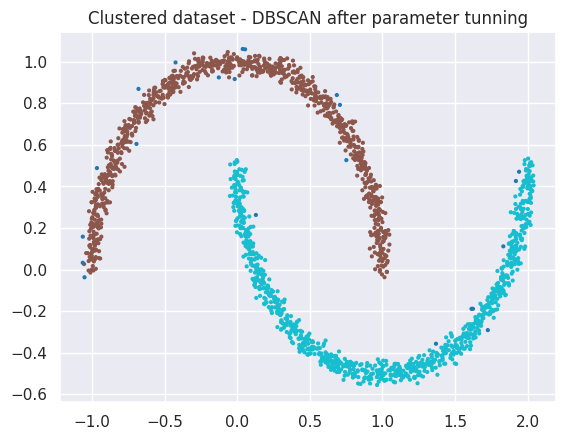

In [12]:
# Cluster again
dbscan_tun = DBSCAN(eps=0.038, min_samples=4)
_ = dbscan_tun.fit(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=dbscan_tun.labels_, s=4)
plt.title('Clustered dataset - DBSCAN after parameter tunning')
plt.show()
# now DBscan has managed to discover two clusters and several outliers

In [13]:
silhouette_score(X, kmeans.labels_)

0.4922754310583637

In [14]:
silhouette_score(X, dbscan_tun.labels_)
# even though DBSCAN did a better job of clustering this data, a silhouette score is higher for K-means clustering
# and this is the case because silhouette score is a distance based clustering quality metric

0.2413514442727672